In [6]:
import pandas as pd
import numpy as np
import re
import datetime

In [7]:
#Importando o dataframe
shark_attack = pd.read_csv('data/attacks.csv', encoding = 'latin1')

In [8]:
#Obtendo informações das colunas
shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [9]:
#verificando as colunas com poucas informações
print(shark_attack[shark_attack['Unnamed: 22'].notna()])
print(shark_attack[shark_attack['Unnamed: 23'].notna()])

     Case Number         Date    Year        Type Country    Area  \
1478  2006.05.27  27-May-2006  2006.0  Unprovoked     USA  Hawaii   

                Location Activity          Name Sex   ... Species   \
1478  North Shore, O'ahu  Surfing  Bret Desmond    M  ...      NaN   

     Investigator or Source                     pdf  \
1478             R. Collier  2006.05.27-Desmond.pdf   

                                           href formula  \
1478  http://sharkattackfile.net/spreadsheets/pdf_di...   

                                                   href Case Number.1  \
1478  http://sharkattackfile.net/spreadsheets/pdf_di...    2006.05.27   

     Case Number.2 original order   Unnamed: 22 Unnamed: 23  
1478    2006.05.27         4825.0  stopped here         NaN  

[1 rows x 24 columns]
       Case Number                  Date    Year        Type  \
4415    1952.03.30           30-Mar-1952  1952.0  Unprovoked   
5840  1878.09.14.R  Reported 14-Sep-1878  1878.0    Provoked   

   

In [10]:
#Tirando as ultimas duas colunas que não possuiam informação
filter1 = shark_attack.drop(columns = ['Unnamed: 22','Unnamed: 23'])
filter1

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#tirar todas as linhas que possuem somente NaN
filter2 = filter1.dropna(how = 'all')


In [12]:
#Procurando os 10 paises com mais casos
pais_e_data = filter2.groupby(by=['Country']).count()
pais_e_data = pais_e_data.sort_values('Case Number', ascending=False).head(10)


In [13]:
#tirar linhas que possuem menos do que 60% das colunas completas
q60=len(shark_attack.columns)*0.6 
filter3 = filter2.dropna(thresh=q60)

In [14]:
#tirando palavras da coluna de data
filter3['Date'] = filter3['Date'].str.replace(r'[A-z]+ ','')

<ipython-input-14-d3ec5c23f47a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  filter3['Date'] = filter3['Date'].str.replace(r'[A-z]+ ','')
<ipython-input-14-d3ec5c23f47a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3['Date'] = filter3['Date'].str.replace(r'[A-z]+ ','')


In [15]:
#Verificando as linhas com o ano sem informação
filter3[filter3['Year'].isna()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
187,2017.01.08.R,08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,NaN,NaN,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0
6079,1836.08.19.R,19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,Y,NaN,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0


In [16]:
#preenchendo o ano de linhas que possuiam data mas no ano estava NaN
filter3['Year'][6079]=1836
filter3['Year'][187]=2017

<ipython-input-16-58cc96dec1a6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3['Year'][6079]=1836
C:\Users\guede\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-16-58cc96dec1a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3['Year'][187]=2017


In [17]:
#Limpando as informaçõs da coluna Date e criando uma nova coluna com os anos a partir destas
filter3['year_new']= [re.findall(r'[0-9]{4}',data) for data in filter3['Date']]
filter3['year_new'] = [''.join(ano[-4:]) for ano in  filter3['year_new']]
filter3['year_new'] = [ano[-4:] for ano in  filter3['year_new']]

<ipython-input-17-7ff8af5cf0a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3['year_new']= [re.findall(r'[0-9]{4}',data) for data in filter3['Date']]
<ipython-input-17-7ff8af5cf0a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3['year_new'] = [''.join(ano[-4:]) for ano in  filter3['year_new']]
<ipython-input-17-7ff8af5cf0a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [18]:
#Transformando a coluna do Ano em inteiros e verificando se ainda possuiam valores não preenchidos ou errados
#vai dar erro ao rodar o codigo e a partir deste erro, é feita a correção nas seguintes linhas do código
filter3['year_new'].astype(int)

ValueError: invalid literal for int() with base 10: ''

In [19]:
#Olhando as linhas nas quais os valores da coluna do Ano são vazias 
filter3[filter3['year_new']=='']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,year_new
4644,1944.07.22,22-Jul-144,1944.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Hartenbos,Swimming,Albert Schmidt,M,...,16h30,"White shark, according to witnesses","M. Levine, GSAF",1944.07.22-Schmidt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1944.07.22,1944.07.22,1659.0,
4802,1939.00.00.e,II,1939.0,Sea Disaster,SRI LANKA,NaN,NaN,She was on a ship that was torpedoes & was in ...,A W.R.E.N.,F,...,NaN,NaN,"V.M. Coppleson (1962), p.258",1939.00.00.e-WREN.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1939.00.00.e,1939.00.00.e,1501.0,
4838,1937.09.26.R,26-Sep-t937,1937.0,Provoked,CROATIA,Split-Dalmatia County,Bisk,Fishing,2 males,M,...,NaN,NaN,"C. Moore, GSAF",1937.09.16.R-Omis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1937.09.26.R,1937.09.26.R,1465.0,
6174,0500.00.00,500 A.D.,500.0,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,...,NaN,NaN,J. Castro,500AD-Mexico.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0500.00.00,0500.00.00,129.0,
6175,0077.00.00,77 A.D.,77.0,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,...,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...,77AD-Pliny.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0077.00.00,0077.00.00,128.0,
6176,0005.00.00,Ca. 5 A.D.,5.0,Unprovoked,AUSTRALIA,New South Wales,Bondi,NaN,male,M,...,NaN,NaN,Waverly Library,0005.00.00-AustralianAboriginal.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0005.00.00,0005.00.00,127.0,
6177,0000.0214,Ca. 214 B.C.,0.0,Unprovoked,NaN,Ionian Sea,NaN,Ascending from a dive,"Tharsys, a sponge diver",M,...,NaN,NaN,"Reported by Greek poet, Leonidas of Tarentum (...",214BC-Tharsys.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0214,0000.0214,126.0,
6178,0000.0336,Ca. 336.B.C..,0.0,Unprovoked,GREECE,Piraeus,In the haven of Cantharus,Washing his pig in preparation for a religious...,A candidate for initiation,M,...,NaN,NaN,Plutarch (45 - 125 A.D.) in Life of Phoecion (...,336-BC-Carnathus.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0336,0000.0336,125.0,
6179,0000.0493,493 B.C.,0.0,Sea Disaster,GREECE,Off Thessaly,NaN,Shipwrecked Persian Fleet,males,M,...,NaN,NaN,Herodotus (485 - 425 B.C.),493BC-PersianFleet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0493,0000.0493,124.0,
6180,0000.0725,Ca. 725 B.C.,0.0,Sea Disaster,ITALY,Tyrrhenian Sea,Krater found during excavations at Lacco Ameno...,Shipwreck,males,M,...,NaN,NaN,"V.M. Coppleson (1958), p.262, et al",725BC-vase.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,0000.0725,0000.0725,123.0,


In [20]:
#Preenchendo manualmente as colunas que possuiam a informação do ano porém em outra coluna
filter3['year_new'][4644]=1944
filter3['year_new'][4802]=1939
filter3['year_new'][4838]=1937

<ipython-input-20-595ed40a5218>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3['year_new'][4644]=1944
C:\Users\guede\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-20-595ed40a5218>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter3['year_new'][4802]=1939
<ipython-input-20-595ed40a5218>:4: Se

In [21]:
#Tirando as colunas que não possuiam informações suficientes para preencher o Ano
filter4= filter3.drop(filter3[filter3['year_new']==''].index)

In [22]:
#Transformando a coluna do Ano em inteiros e verificando se ainda possuiam valores não preenchidos ou errados
filter4['year_new'] = filter4['year_new'].astype(int)

In [23]:
#Criando um dataframe so com os casos no EUA porque é o pais com mais relatos
dataframe_USA = filter4[filter4['Country'].eq('USA')]

In [24]:
#filtrar acima do ano de 1950
dataframe_USA_gt1950 =dataframe_USA[dataframe_USA['year_new']>1950]
dataframe_USA_gt1950

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,year_new
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,2018
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,2018
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,2018
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,...,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.27,2018.05.27,6296.0,2018
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,...,17h00,"Bull shark, 6'","K.McMurray, TrackingSharks.com",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.05.26.b,2018.05.26.b,6295.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6226,ND.0087,"date, 1975",0.0,Provoked,USA,Florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,...,NaN,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",ND-0087-Carl-Bruster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0087,ND.0087,77.0,1975
6230,ND.0083,"date, 1963",0.0,Unprovoked,USA,California,"LaJolla, San Diego County","Free diving, collecting sand dollars",Charles Fleming,M,...,NaN,"Shovelnose guitarfish, adult male","C. Limbaugh in Sharks & Survival, pp.77-78",ND-0083-Fleming.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0083,ND.0083,73.0,1963
6232,ND.0081,"date, 1963",0.0,Invalid,USA,Hawaii,"Portlock, Oahu",Diving,Val Valentine,M,...,NaN,Invalid,B. Sojka & D. Lloyd,ND-0081-Valentine.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0081,ND.0081,71.0,1963
6245,ND.0060,19-Jun-1959,0.0,Unprovoked,USA,California,"Capistrano, Orange County",NaN,girl,F,...,NaN,"White shark, 1,900-lb","B. Walton, Sun (San Bernardino), 6/19/1959",ND-0060-Capistrano.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0060,ND.0060,58.0,1959


In [25]:
#Verificando o somátorio de casos por ano
dataframe_USA_gt1950_year = dataframe_USA_gt1950.groupby(by=['year_new']).count()
dataframe_USA_gt1950_year
sum(dataframe_USA_gt1950_year['Case Number'])

1871

In [26]:
#Criando novo dataframe para verificar o maior numero de casos por ano
dataframe_USA_filtrado = dataframe_USA_gt1950.loc[:,['year_new','Country','Area','Activity']]
dataframe_USA_groupby = dataframe_USA_filtrado.groupby(by=['year_new']).count()
dataframe_USA_groupby['Casos'] = np.where(dataframe_USA_groupby['Country']>dataframe_USA_groupby['Area'],dataframe_USA_groupby['Country'],np.where(dataframe_USA_groupby['Area']>dataframe_USA_groupby['Activity'],dataframe_USA_groupby['Area'],dataframe_USA_groupby['Activity']))
dataframe_USA_groupby = dataframe_USA_groupby.reset_index()

In [27]:
#Criando um segundo dataframe para conseguir fazer operação entre eles e obter a taxa por ano
dataframe_USA_gt1949 =dataframe_USA[dataframe_USA['year_new']<=2017]
dataframe_USA_gt1949 =dataframe_USA_gt1949[dataframe_USA_gt1949['year_new']>1949]
dataframe_USA_filtrado2 = dataframe_USA_gt1949.loc[:,['year_new','Country','Area','Activity']]
dataframe_USA_groupby2 = dataframe_USA_filtrado2.groupby(by=['year_new']).count()
dataframe_USA_groupby2['Casos'] = np.where(dataframe_USA_groupby2['Country']>dataframe_USA_groupby2['Area'],dataframe_USA_groupby2['Country'],np.where(dataframe_USA_groupby2['Area']>dataframe_USA_groupby2['Activity'],dataframe_USA_groupby2['Area'],dataframe_USA_groupby2['Activity']))
dataframe_USA_groupby2 = dataframe_USA_groupby2.reset_index()

In [28]:
#Criando a coluna da taxa de crescimento de ataques de tubarao nos EUA
dataframe_USA_groupby['Variação Ano a Ano dos Ataques de Tubarão']= (dataframe_USA_groupby['Casos'] - dataframe_USA_groupby2['Casos'])/dataframe_USA_groupby2['Casos']

In [29]:
dataframe_USA_groupby

,year_new,Country,Area,Activity,Casos,Variação Ano a Ano dos Ataques de Tubarão
0,1951,2,2,1,2,-0.777778
1,1952,11,11,11,11,4.500000
2,1953,11,11,11,11,0.000000
3,1954,7,7,6,7,-0.363636
4,1955,13,13,11,13,0.857143
...,...,...,...,...,...,...
63,2014,66,66,63,66,0.081967
64,2015,73,73,67,73,0.106061
65,2016,64,64,60,64,-0.123288
66,2017,65,65,59,65,0.015625


<AxesSubplot:xlabel='year_new'>

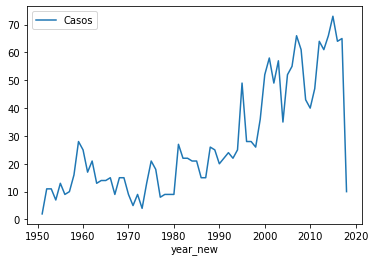

In [30]:
dataframe_USA_groupby.plot(x='year_new',y= ['Casos'])

<AxesSubplot:xlabel='year_new'>

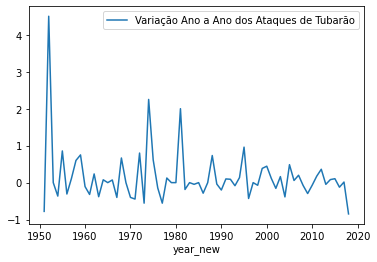

In [31]:
#Obtendo o primeiro gráfico para visualizar melhor os resultados
dataframe_USA_groupby.plot(x='year_new',y= ['Variação Ano a Ano dos Ataques de Tubarão']) 

In [32]:
#Limpando e renomeando as colunas
dataframe_USA_groupby['Ano'] = dataframe_USA_groupby['year_new']
dataframe_USA_groupby_final = dataframe_USA_groupby.drop(columns = ['Country','Activity','Area','Ano'])
dataframe_USA_groupby_final = dataframe_USA_groupby_final.rename(columns={'year_new':'Ano'})

In [33]:
#dataframe final baseado no numero de casos e a taxa de crescimento dos ataques
dataframe_USA_groupby_final

,Ano,Casos,Variação Ano a Ano dos Ataques de Tubarão
0,1951,2,-0.777778
1,1952,11,4.500000
2,1953,11,0.000000
3,1954,7,-0.363636
4,1955,13,0.857143
...,...,...,...
63,2014,66,0.081967
64,2015,73,0.106061
65,2016,64,-0.123288
66,2017,65,0.015625


In [34]:
#Importando e selecionando o numero de linhas do dataframe com a taxa de crescimento da populaçao dos EUA
crescimento_pop_usa = pd.read_excel('data/populacaoUSA.xlsx')
crescimento_pop_usa1 =crescimento_pop_usa.drop(crescimento_pop_usa.index[[68,69,70]]) 
crescimento_pop_usa1

,Ano,População,Taxa de crescimento
0,1951,159 846 829,N/A %
1,1952,162 075 685,1.39 %
2,1953,164 598 877,1.56 %
3,1954,167 334 808,1.66 %
4,1955,170 222 982,1.73 %
...,...,...,...
63,2014,317 546 321,0.73 %
64,2015,319 784 928,0.70 %
65,2016,321 952 993,0.68 %
66,2017,324 058 877,0.65 %


In [35]:
#Adicionando a coluna da taxa de crescimento da populaçao americana ao dataframe com as informações dos ataques
dataframe_USA_groupby_final['Taxa de crescimento populacao EUA']= crescimento_pop_usa1[['Taxa de crescimento']]
dataframe_USA_groupby_final

,Ano,Casos,Variação Ano a Ano dos Ataques de Tubarão,Taxa de crescimento populacao EUA
0,1951,2,-0.777778,N/A %
1,1952,11,4.500000,1.39 %
2,1953,11,0.000000,1.56 %
3,1954,7,-0.363636,1.66 %
4,1955,13,0.857143,1.73 %
...,...,...,...,...
63,2014,66,0.081967,0.73 %
64,2015,73,0.106061,0.70 %
65,2016,64,-0.123288,0.68 %
66,2017,65,0.015625,0.65 %


In [36]:
#limpando a coluna com os dados da taxa de crescimento da população americana
dataframe_USA_groupby_final['Taxa de crescimento populacao EUA'] = dataframe_USA_groupby_final['Taxa de crescimento populacao EUA'].str.replace(r' %','')


In [37]:
#preenchendo a primeira linha da coluna da taxa de crescimento dos EUA com base em busca na intenet
dataframe_USA_groupby_final['Taxa de crescimento populacao EUA'][0] = 1.29

<ipython-input-37-bf244047f194>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_USA_groupby_final['Taxa de crescimento populacao EUA'][0] = 1.29


In [38]:
#Transformando a coluna da taxa de crescimento dos EUA em float
dataframe_USA_groupby_final[['Taxa de crescimento populacao EUA']] = dataframe_USA_groupby_final[['Taxa de crescimento populacao EUA']].astype(float)

In [39]:
dataframe_USA_groupby_final

,Ano,Casos,Variação Ano a Ano dos Ataques de Tubarão,Taxa de crescimento populacao EUA
0,1951,2,-0.777778,1.29
1,1952,11,4.500000,1.39
2,1953,11,0.000000,1.56
3,1954,7,-0.363636,1.66
4,1955,13,0.857143,1.73
...,...,...,...,...
63,2014,66,0.081967,0.73
64,2015,73,0.106061,0.70
65,2016,64,-0.123288,0.68
66,2017,65,0.015625,0.65


<AxesSubplot:xlabel='Ano'>

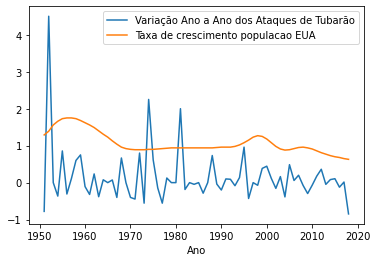

In [40]:
#plotando o gráfico comparando as taxas de crescimento de ataques e da populaçao dos EUA 
dataframe_USA_groupby_final.plot(x='Ano',y= ['Variação Ano a Ano dos Ataques de Tubarão','Taxa de crescimento populacao EUA']) 

<AxesSubplot:xlabel='Variação Ano a Ano dos Ataques de Tubarão', ylabel='Taxa de crescimento populacao EUA'>

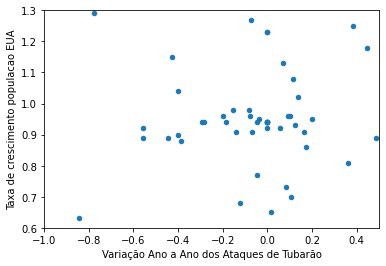

In [41]:
dataframe_USA_groupby_final.plot.scatter(x ='Variação Ano a Ano dos Ataques de Tubarão' ,y='Taxa de crescimento populacao EUA', xlim=(-1,0.5), ylim=(0.6,1.3))

In [42]:
#importando o dataframe com as informações do nivel do mar ao longo dos anos
sea_level = pd.read_csv('data/sea-level_fig-1.csv')


In [43]:
#Limpando o dataframe do nivel do mar
sea_level['Elevação do nivel do mar(polegadas)'] = np.where(sea_level[['CSIRO - Adjusted sea level (inches)']].notna(),sea_level[['CSIRO - Adjusted sea level (inches)']],sea_level[['NOAA - Adjusted sea level (inches)']])

In [44]:
#criando primeiro dataframe para calculo da taxa da elevação do nivel do mar 
sea_level1 =sea_level[sea_level['Year']>1949]
sea_level1= sea_level1[sea_level['Year']<2018].reset_index()
sea_level1

<ipython-input-44-52200fb2c69b>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sea_level1= sea_level1[sea_level['Year']<2018].reset_index()


,index,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Elevação do nivel do mar(polegadas)
0,70,1950,3.598425,3.287402,3.909449,NaN,3.598425
1,71,1951,3.972441,3.665354,4.279528,NaN,3.972441
2,72,1952,3.870079,3.566929,4.173228,NaN,3.870079
3,73,1953,4.043307,3.748031,4.338583,NaN,4.043307
4,74,1954,3.929134,3.641732,4.216535,NaN,3.929134
...,...,...,...,...,...,...,...
63,133,2013,8.913386,8.562992,9.263780,8.453925,8.913386
64,134,2014,NaN,NaN,NaN,8.579437,8.579437
65,135,2015,NaN,NaN,NaN,8.925435,8.925435
66,136,2016,NaN,NaN,NaN,9.036237,9.036237


In [45]:
#criando segundo dataframe para calculo da taxa da elevação do nivel do mar
sea_level2 =sea_level[sea_level['Year']>1950]
sea_level2= sea_level2[sea_level['Year']<2019].reset_index()
sea_level2

<ipython-input-45-e7e0dc3060d3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sea_level2= sea_level2[sea_level['Year']<2019].reset_index()


,index,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Elevação do nivel do mar(polegadas)
0,71,1951,3.972441,3.665354,4.279528,NaN,3.972441
1,72,1952,3.870079,3.566929,4.173228,NaN,3.870079
2,73,1953,4.043307,3.748031,4.338583,NaN,4.043307
3,74,1954,3.929134,3.641732,4.216535,NaN,3.929134
4,75,1955,3.964567,3.685039,4.244094,NaN,3.964567
...,...,...,...,...,...,...,...
63,134,2014,NaN,NaN,NaN,8.579437,8.579437
64,135,2015,NaN,NaN,NaN,8.925435,8.925435
65,136,2016,NaN,NaN,NaN,9.036237,9.036237
66,137,2017,NaN,NaN,NaN,9.087686,9.087686


In [46]:
#criando a coluna com o calculo da taxa da elevação do nivel do mar
sea_level2[['Variação da elevação dos mares']] =  (sea_level2[['Elevação do nivel do mar(polegadas)']] - sea_level1[['Elevação do nivel do mar(polegadas)']])/sea_level1[['Elevação do nivel do mar(polegadas)']]

In [47]:
sea_level2

,index,Year,CSIRO - Adjusted sea level (inches),CSIRO - Lower error bound (inches),CSIRO - Upper error bound (inches),NOAA - Adjusted sea level (inches),Elevação do nivel do mar(polegadas),Variação da elevação dos mares
0,71,1951,3.972441,3.665354,4.279528,NaN,3.972441,0.103939
1,72,1952,3.870079,3.566929,4.173228,NaN,3.870079,-0.025768
2,73,1953,4.043307,3.748031,4.338583,NaN,4.043307,0.044761
3,74,1954,3.929134,3.641732,4.216535,NaN,3.929134,-0.028238
4,75,1955,3.964567,3.685039,4.244094,NaN,3.964567,0.009018
...,...,...,...,...,...,...,...,...
63,134,2014,NaN,NaN,NaN,8.579437,8.579437,-0.037466
64,135,2015,NaN,NaN,NaN,8.925435,8.925435,0.040329
65,136,2016,NaN,NaN,NaN,9.036237,9.036237,0.012414
66,137,2017,NaN,NaN,NaN,9.087686,9.087686,0.005694


In [48]:
#adicionando a taxa do nivel do mar ao dataframe com as informações dos EUA
dataframe_USA_groupby_final['Variação da elevação dos mares']= sea_level2[['Variação da elevação dos mares']]

<AxesSubplot:xlabel='Ano'>

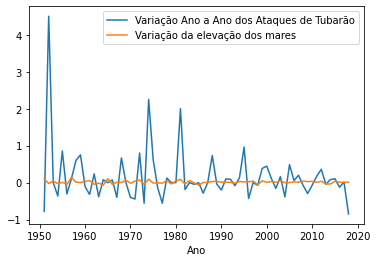

In [49]:
#plotando o gráfico comparando as taxas de crescimento de ataques e da elevação dos mares
dataframe_USA_groupby_final.plot(x='Ano',y= ['Variação Ano a Ano dos Ataques de Tubarão','Variação da elevação dos mares']) 

<AxesSubplot:xlabel='Variação Ano a Ano dos Ataques de Tubarão', ylabel='Variação da elevação dos mares'>

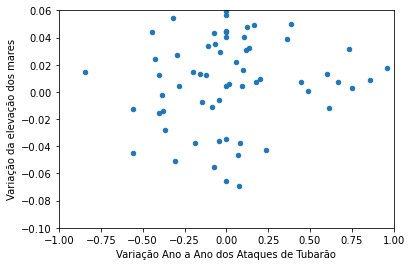

In [50]:
dataframe_USA_groupby_final.plot.scatter(x ='Variação Ano a Ano dos Ataques de Tubarão' ,y= 'Variação da elevação dos mares', xlim=(-1,1) , ylim=(-0.1,0.06) )

In [51]:
dataframe_USA_groupby_final.corr()

,Ano,Casos,Variação Ano a Ano dos Ataques de Tubarão,Taxa de crescimento populacao EUA,Variação da elevação dos mares
Ano,1.000000,0.798964,-0.177444,-0.716850,-0.039653
Casos,0.798964,1.000000,0.019472,-0.394716,-0.005361
Variação Ano a Ano dos Ataques de Tubarão,-0.177444,0.019472,1.000000,0.122088,0.100845
Taxa de crescimento populacao EUA,-0.716850,-0.394716,0.122088,1.000000,0.025172
Variação da elevação dos mares,-0.039653,-0.005361,0.100845,0.025172,1.000000


In [52]:
#importando e limpando o dataframe com as informações da anomalia da temperatura do mar
sea_temp = pd.read_csv('data/sea-surface-temp_fig-1.csv')
sea_temp = sea_temp[sea_temp['Year']>1950]
sea_temp = sea_temp[sea_temp['Year']<2019].reset_index()
sea_temp

,index,Year,Annual anomaly,Lower 95% confidence interval,Upper 95% confidence interval
0,71,1951,-0.420,-0.508200,-0.331800
1,72,1952,-0.312,-0.414312,-0.209688
2,73,1953,-0.312,-0.417840,-0.206160
3,74,1954,-0.600,-0.684672,-0.515328
4,75,1955,-0.636,-0.727728,-0.544272
...,...,...,...,...,...
63,134,2014,0.642,0.606720,0.677280
64,135,2015,0.858,0.819192,0.896808
65,136,2016,0.930,0.891192,0.968808
66,137,2017,0.822,0.779664,0.864336


In [53]:
#adicionando a anomalia da temperatura do mar ao dataframe com as informações dos EUA
dataframe_USA_groupby_final['Anomalia temperatura dos mares']= sea_temp[['Annual anomaly']]

<AxesSubplot:xlabel='Ano'>

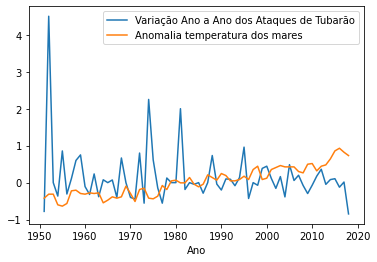

In [54]:
#plotando o gráfico comparando as taxas de crescimento de ataques e anomalia
dataframe_USA_groupby_final.plot(x='Ano',y= ['Variação Ano a Ano dos Ataques de Tubarão','Anomalia temperatura dos mares']) 

<AxesSubplot:xlabel='Variação Ano a Ano dos Ataques de Tubarão', ylabel='Anomalia temperatura dos mares'>

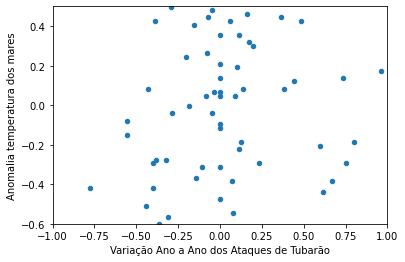

In [55]:
dataframe_USA_groupby_final.plot.scatter(x ='Variação Ano a Ano dos Ataques de Tubarão' ,y= 'Anomalia temperatura dos mares', xlim=(-1,1) , ylim=(-0.6,0.5) )

In [59]:
dataframe_USA_groupby_final.to_csv('ataque_tubarao_clean.csv', index=False)